# Wide ResNet 28 10

# 1. Environment Setup
## 1.0. Check GPU

In [1]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0


## 1.1. Install matplotlib

In [2]:
!pip install matplotlib

## 1.2. Import

In [3]:
import train

import torch
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt

# Ignore Warning
import warnings
warnings.filterwarnings(action='ignore')

# 2. Data Preprocessing

In [4]:
batch_size = 128

In [5]:
train_transform = transforms.Compose([
    transforms.RandomCrop(32, padding=4, padding_mode='reflect'), transforms.RandomHorizontalFlip(),
    transforms.ToTensor(), transforms.Normalize(mean=[0.4921, 0.4828, 0.4474], std=[0.1950, 0.1922, 0.1940])])

test_transform = transforms.Compose([
    transforms.ToTensor(), transforms.Normalize(mean=[0.4921, 0.4828, 0.4474], std=[0.1950, 0.1922, 0.1940])])

train_dataset = torchvision.datasets.CIFAR10('../Dataset/cifar10/', train=True, download=False, transform=train_transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, pin_memory=True)

test_dataset = torchvision.datasets.CIFAR10('../Dataset/cifar10/', train=False, download=False, transform=test_transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False, pin_memory=True)

# 3. Train Model

In [6]:
depth = 28
widen_factor = 10
dropout_rate = 0.3
num_classes = 10

gpu_id = 4
print_freq = 60
epoch_print = 10

save = False
epochs = 201

lr = 0.1
momentum = 0.9
weight_decay = 0.0005
nesterov = True
milestones = [60, 120, 160]

In [7]:
WRN_28_10 = train.Wide_ResNet(depth, widen_factor, dropout_rate, num_classes, gpu_id, print_freq, epoch_print)

In [8]:
WRN_28_10.train(train_loader, test_loader, save, epochs, lr, momentum, weight_decay, nesterov, milestones)

Epoch 1 Started...

*********************************** Best Acc Updated ***********************************
Iteration : 60 - Train Loss : 1.8606, Test Loss : 2.2387, Train Acc : 34.3750, Test Acc : 23.9600

*********************************** Best Acc Updated ***********************************
Iteration : 120 - Train Loss : 1.6138, Test Loss : 1.8819, Train Acc : 42.1875, Test Acc : 32.4700

*********************************** Best Acc Updated ***********************************
Iteration : 180 - Train Loss : 1.3879, Test Loss : 1.5362, Train Acc : 45.3125, Test Acc : 44.0300

*********************************** Best Acc Updated ***********************************
Iteration : 240 - Train Loss : 1.3335, Test Loss : 1.5311, Train Acc : 55.4688, Test Acc : 46.5300

*********************************** Best Acc Updated ***********************************
Iteration : 300 - Train Loss : 1.3032, Test Loss : 1.1246, Train Acc : 55.4688, Test Acc : 59.1500
Iteration : 360 - Train Loss : 0.8905

Iteration : 300 - Train Loss : 0.0974, Test Loss : 0.2473, Train Acc : 96.8750, Test Acc : 92.6400
Iteration : 360 - Train Loss : 0.0853, Test Loss : 0.2415, Train Acc : 97.6562, Test Acc : 92.9500
Epoch 111 Started...
Iteration : 60 - Train Loss : 0.0623, Test Loss : 0.2640, Train Acc : 98.4375, Test Acc : 92.3800
Iteration : 120 - Train Loss : 0.0629, Test Loss : 0.2632, Train Acc : 96.8750, Test Acc : 92.1300
Iteration : 180 - Train Loss : 0.0733, Test Loss : 0.2550, Train Acc : 96.8750, Test Acc : 92.6300
Iteration : 240 - Train Loss : 0.0904, Test Loss : 0.2306, Train Acc : 97.6562, Test Acc : 93.2000
Iteration : 300 - Train Loss : 0.1221, Test Loss : 0.3202, Train Acc : 96.0938, Test Acc : 91.1700
Iteration : 360 - Train Loss : 0.0775, Test Loss : 0.2741, Train Acc : 98.4375, Test Acc : 91.6900
Epoch 121 Started...

*********************************** Best Acc Updated ***********************************
Iteration : 60 - Train Loss : 0.0282, Test Loss : 0.1736, Train Acc : 100.000

Text(0, 0.5, 'Accuracy')

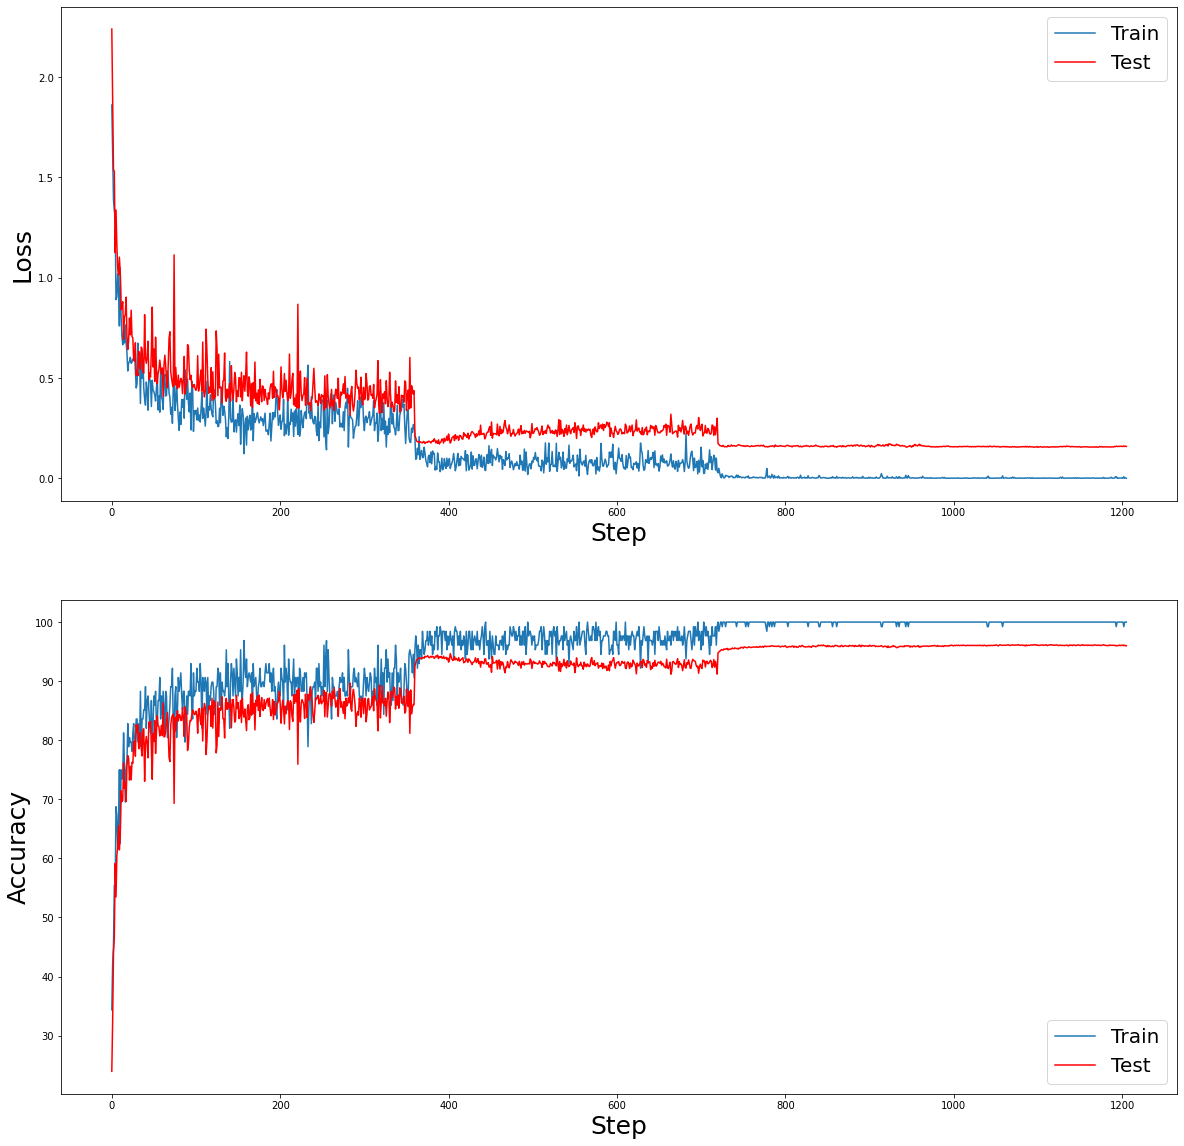

In [9]:
plt.figure(figsize=(20, 20))
plt.rcParams['axes.titlesize'] = 30
plt.axis('off')

label_fontsize = 25

plt.subplot(2, 1, 1)
train_lossline, = plt.plot(WRN_28_10.train_losses, label='Train')
test_lossline, = plt.plot(WRN_28_10.test_losses, color='red', label='Test')
plt.legend(handles=[train_lossline, test_lossline], fontsize=20)
plt.xlabel('Step', fontsize=label_fontsize)
plt.ylabel('Loss', fontsize=label_fontsize)

plt.subplot(2, 1, 2)
train_accline, = plt.plot(WRN_28_10.train_acc, label='Train')
test_accline, = plt.plot(WRN_28_10.test_acc, color='red', label='Test')
plt.legend(handles=[train_accline, test_accline], fontsize=20)
plt.xlabel('Step', fontsize=label_fontsize)
plt.ylabel('Accuracy', fontsize=label_fontsize)